In [2]:
%matplotlib inline

# Nutrition and Fitness Correlation Analysis

In [11]:
# First step is to import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [24]:
#After that loading the dataset 
daily_performance_dataset = pd.read_csv('data/Daily_performance_data.csv')

In [26]:
# Then I will familiarizate with dataset also I am going to perform data tidying and data cleaning if it is necessary.
# Getting general information about the dataset
daily_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  341 non-null    object 
 1   Weight                332 non-null    float64
 2   scriptedIntensity     341 non-null    object 
 3   RPE                   292 non-null    float64
 4   Strain                326 non-null    float64
 5   maxHR                 318 non-null    float64
 6   averageHR             318 non-null    float64
 7   kCal_Out              307 non-null    float64
 8   kCal_In               248 non-null    float64
 9   Protein               246 non-null    float64
 10  Carbs                 247 non-null    float64
 11  Fats                  245 non-null    float64
 12  saturatedFat          246 non-null    float64
 13  Cholesterol           246 non-null    float64
 14  Sodium                245 non-null    float64
 15  Potassium             2

In [23]:
# To check how many rows and columns the dataset has, i will use this command:
daily_performance_dataset.shape 

(347, 45)

In [14]:
# as we see it has 347 rows and 45 columns. 
# Now I want to see what are the names of the columns
daily_performance_dataset.columns

Index(['Date', 'Weight', 'scriptedIntensity', 'RPE', 'Strain', 'maxHR',
       'averageHR', 'kCal_Out', 'kCal_In', 'Protein', 'Carbs', 'Fats',
       'saturatedFat', 'Cholesterol', 'Sodium', 'Potassium', 'Sugar',
       'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron', 'Creatine', 'Fish Oil',
       'Vitamin_D', '135ozWater', 'totalSleep', 'sleepOnset', 'sleepEnd',
       'In_bed_duration', 'Light_sleep_duration', 'Deep_SWS_duration',
       'REM_Duration', 'awakeDuration', 'HRV', 'restingHR', 'respitoryRate',
       'iceTub', 'redLight', 'Speed', 'Strength', 'Mental', 'Soreness',
       'Overall', 'Notes', 'Alcohol'],
      dtype='object')

In [17]:
# I want to see how dataset looks like but not whole, only first 2 rows. I make this to get some basic image of the dataset.
daily_performance_dataset.head(2)

Date  Weight scriptedIntensity  RPE  Strain  maxHR  \
0    Tuesday, March 1, 2022   227.0            Medium  6.0     9.4  173.0   
1  Wednesday, March 2, 2022   228.0             Light  5.0     7.2  156.0   

   averageHR  kCal_Out  kCal_In  Protein  ...  respitoryRate  iceTub  \
0      132.0    2389.0   3819.8    285.7  ...           13.5    True   
1      128.0    2420.0   2849.6    223.0  ...           13.4    True   

   redLight  Speed  Strength  Mental  Soreness  Overall  Notes  Alcohol  
0      True    8.0       9.0    10.0       2.0      8.0    NaN    False  
1     False    7.0       9.0     8.0       4.0      7.0    NaN    False  

[2 rows x 45 columns]

In [19]:
# Check if the dataset has some null or missing values
daily_performance_dataset.isna().sum()

Date                      6
Weight                   15
scriptedIntensity         6
RPE                      55
Strain                   21
maxHR                    29
averageHR                29
kCal_Out                 40
kCal_In                  99
Protein                 101
Carbs                   100
Fats                    102
saturatedFat            101
Cholesterol             101
Sodium                  102
Potassium               104
Sugar                   104
Vitamin_A               104
Vitamin_C               105
Calcium                 107
Iron                    108
Creatine                  6
Fish Oil                  6
Vitamin_D                 6
135ozWater                6
totalSleep               65
sleepOnset               66
sleepEnd                 66
In_bed_duration          66
Light_sleep_duration     66
Deep_SWS_duration        66
REM_Duration             66
awakeDuration            68
HRV                      54
restingHR                52
respitoryRate       

In [30]:
# as we see there is a lot of missing values. I can't simple drop null values, 
# because it is a lot and i will lost a lot of information with this action.
# Now i want to check type of the columns. That will help me to take decision how to fill this missing information 
daily_performance_dataset.dtypes

Date                     object
Weight                  float64
scriptedIntensity        object
RPE                     float64
Strain                  float64
maxHR                   float64
averageHR               float64
kCal_Out                float64
kCal_In                 float64
Protein                 float64
Carbs                   float64
Fats                    float64
saturatedFat            float64
Cholesterol             float64
Sodium                  float64
Potassium               float64
Sugar                   float64
Vitamin_A               float64
Vitamin_C               float64
Calcium                 float64
Iron                    float64
Creatine                 object
Fish Oil                 object
Vitamin_D                object
135ozWater               object
totalSleep              float64
sleepOnset               object
sleepEnd                 object
In_bed_duration         float64
Light_sleep_duration    float64
Deep_SWS_duration       float64
REM_Dura

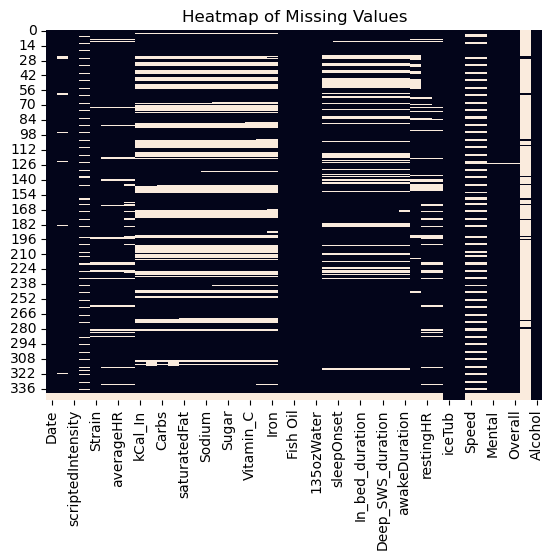

In [68]:
# plot a null values in heatmap to see where are they. 
sns.heatmap(daily_performance_dataset.isnull(), cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()